<h2>Your Name: Ammara Laeeq</h2>
<h2>Email: ammaramalik@gmail.com</h2>
<h4>Deadline: 08/12/2020 9:00 GMT + 3</h4>

## Homework

* Import Boston Dataset from Sklearn Dataset class
* Explore and analyse raw data.
* Do preprocessing for regression quest.
* Split your dataset into train and test set (0.7 for train and 0.3 for test).
* Build Ridge Regression model with at least 5 different alpha values. (Use GridSearchCV to tune your model)
* Is there any overfitting and underfitting?
* Evaluate your result. 

In [7]:
## Import Boston Dataset from Sklearn Dataset class

from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns

X,y =load_boston(return_X_y=True)

boston_df = pd.DataFrame(X, columns = load_boston().feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [2]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [3]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [4]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [5]:
duplicateRowsDF = boston_df[boston_df.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]
Index: []


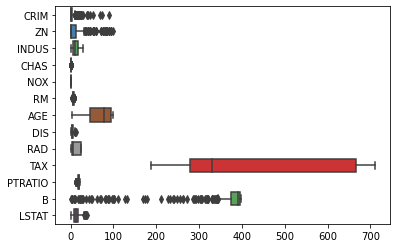

In [9]:
ax = sns.boxplot(data=boston_df, orient="h", palette="Set1")

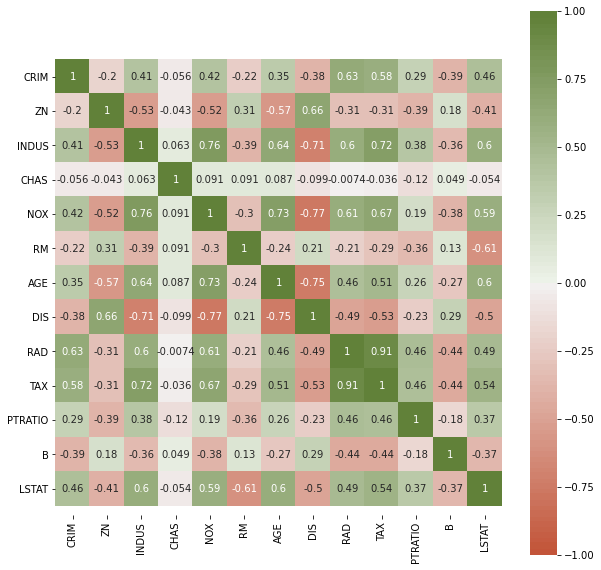

In [30]:
# check Correlation of features
import seaborn as sb
import matplotlib.pyplot as plt
corr_coeff = boston_df.corr()

plt.figure(figsize=(10, 10))
ax = sb.heatmap(
    corr_coeff, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 110, n=100),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
)
ax.set_ylim(len(corr_coeff)+0.25, -0.25);

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

trainX, testX, trainy, testy = train_test_split(X,y, test_size=0.3, random_state=33)
model = Ridge(alpha = 0.02)
param_dict = {
    'alpha': [0.01, 0.02, 0.03, 0.04, 0.05],
    'normalize': [True, False]
}
gcv = GridSearchCV(model, param_dict, cv=3, n_jobs=-1).fit(trainX,trainy)
print("Tuned: {}".format(gcv.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(gcv.best_score_))
print("Train Score {:.6f}".format(gcv.score(trainX, trainy)))
print("Test Score {:.6f}".format(gcv.score(testX, testy)))

Tuned: {'alpha': 0.05, 'normalize': True}
Mean of the cv scores is 0.688248
Train Score 0.750701
Test Score 0.690389


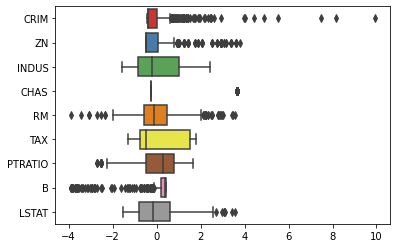

In [19]:
new_df = boston_df
# droppping highly correlated features
X_new = new_df.drop(["AGE","DIS","RAD","NOX"], axis=1)

# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X_new)
X_new = pd.DataFrame(X_scaled, columns=X_new.columns)
ax = sns.boxplot(data=X_new, orient="h", palette="Set1")

In [20]:

trainX, testX, trainy, testy = train_test_split(X_new, y, test_size=0.3, random_state=33)
model = Ridge(alpha = 0.02)
param_dict = {
    'alpha': [0.15, 0.25, 0.35, 0.45, 0.55],
    'normalize': [True, False]
}
gcv = GridSearchCV(model, param_dict, cv=3, n_jobs=-1).fit(trainX,trainy)
print("Tuned: {}".format(gcv.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(gcv.best_score_))
print("Train Score {:.6f}".format(gcv.score(trainX, trainy)))
print("Test Score {:.6f}".format(gcv.score(testX, testy)))

Tuned: {'alpha': 0.25, 'normalize': True}
Mean of the cv scores is 0.650897
Train Score 0.699280
Test Score 0.660625


# Evaluation

<p>Ridge regression has less variance between training and test data if scaling is used. However, Accuracy of the model is better without scaling. Also, dropping highly correlated features are not helping in improving accuracy. Some other prediction model should be used to improve results. Scaling seems to work better to avoid overfitting.</p>